# Importy

In [393]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer, make_blobs
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import OneHotEncoder
from scipy import stats
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import f1_score

# Wczytanie danych

In [394]:
df1=pd.read_csv('df1.csv')
df2=pd.read_csv('df2.csv')

# Preprocessing

In [395]:
df1.head()

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked
0,104,30.0,Travel_Rarely,852.0,Research & Development,1.0,1.0,Life Sciences,1.0,4.0,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,15998.0,1.0
1,1638,38.0,Travel_Rarely,397.0,Research & Development,2.0,2.0,Medical,1.0,4.0,Female,54.0,2.0,3.0,Manufacturing Director,3.0,Married,7756.0,14199.0,3.0
2,164,26.0,Travel_Rarely,841.0,Research & Development,6.0,3.0,Other,1.0,3.0,Female,46.0,2.0,1.0,Research Scientist,2.0,Married,2368.0,23300.0,1.0
3,395,28.0,Travel_Rarely,1117.0,Research & Development,8.0,2.0,Life Sciences,1.0,4.0,Female,66.0,3.0,1.0,Research Scientist,4.0,Single,3310.0,4488.0,1.0
4,53,35.0,Travel_Rarely,464.0,Research & Development,4.0,2.0,Other,1.0,3.0,Male,75.0,3.0,1.0,Laboratory Technician,4.0,Divorced,1951.0,10910.0,1.0


In [396]:
df2.head()

,EmployeeNumber,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
0,104,Y,Yes,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,61512.0
1,1638,Y,Yes,19.0,3.0,4.0,80.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,93072.0
2,164,Y,No,19.0,3.0,3.0,80.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,No,28416.0
3,395,Y,No,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0
4,53,Y,No,12.0,3.0,3.0,80.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No,23412.0


In [397]:
df = pd.merge(df1, df2, on='EmployeeNumber', how='inner')

df

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
0,104,30.0,Travel_Rarely,852.0,Research & Development,1.0,1.0,Life Sciences,1.0,4.0,...,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,61512.0
1,1638,38.0,Travel_Rarely,397.0,Research & Development,2.0,2.0,Medical,1.0,4.0,...,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,93072.0
2,164,26.0,Travel_Rarely,841.0,Research & Development,6.0,3.0,Other,1.0,3.0,...,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,No,28416.0
3,395,28.0,Travel_Rarely,1117.0,Research & Development,8.0,2.0,Life Sciences,1.0,4.0,...,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0
4,53,35.0,Travel_Rarely,464.0,Research & Development,4.0,2.0,Other,1.0,3.0,...,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No,23412.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4444,7975,8823.0,Travel_Rarely,621.0,Research & Development,15.0,3.0,Medical,1.0,1.0,...,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,Yes,95736.0
4445,7976,8823.0,Travel_Rarely,621.0,Research & Development,15.0,3.0,Medical,1.0,1.0,...,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,Yes,95736.0
4446,7977,44.0,Non-Travel,381.0,Research & Development,918785.0,3.0,Medical,1.0,1.0,...,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0,Yes,44496.0
4447,7978,44.0,Non-Travel,381.0,Research & Development,918785.0,3.0,Medical,1.0,1.0,...,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0,Yes,44496.0


In [398]:
# sprawdzenie brakow danych
df.isnull().sum()

EmployeeNumber                0
Age                           0
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtCompany                0
YearsInC

In [399]:

df.dropna(subset=['Attrition'], inplace=True)

assert df['Attrition'].isna().sum()==0, 'Kolumna Attrition nie jest poprawnie wypelniona'


In [400]:
sel_cols = [column for column, is_type in (df.dtypes == "float64").items() if is_type]
df[sel_cols] = df[sel_cols].astype(int)
df

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
0,104,30,Travel_Rarely,852,Research & Development,1,1,Life Sciences,1,4,...,2,10,1,2,10,8,3,0,No,61512
1,1638,38,Travel_Rarely,397,Research & Development,2,2,Medical,1,4,...,1,10,6,4,5,4,0,2,No,93072
2,164,26,Travel_Rarely,841,Research & Development,6,3,Other,1,3,...,0,5,3,2,5,4,4,3,No,28416
3,395,28,Travel_Rarely,1117,Research & Development,8,2,Life Sciences,1,4,...,0,5,3,3,5,3,0,2,No,39720
4,53,35,Travel_Rarely,464,Research & Development,4,2,Other,1,3,...,1,1,3,3,1,0,0,0,No,23412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4444,7975,8823,Travel_Rarely,621,Research & Development,15,3,Medical,1,1,...,1,10,2,3,10,7,0,5,Yes,95736
4445,7976,8823,Travel_Rarely,621,Research & Development,15,3,Medical,1,1,...,1,10,2,3,10,7,0,5,Yes,95736
4446,7977,44,Non-Travel,381,Research & Development,918785,3,Medical,1,1,...,0,9,5,3,5,2,1,4,Yes,44496
4447,7978,44,Non-Travel,381,Research & Development,918785,3,Medical,1,1,...,0,9,5,3,5,2,1,4,Yes,44496


In [401]:
sel_cols2= [column for column, is_type in (df.dtypes == "object").items() if is_type]
sel_cols2

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime',
 'Attrition']

In [402]:
df['JobRole'].unique()

array(['Laboratory Technician', 'Manufacturing Director',
       'Research Scientist', 'Human Resources', 'Research Director',
       'Sales Representative', 'Manager', 'Healthcare Representative',
       'Sales Executive'], dtype=object)

In [403]:
df['JobRole'].value_counts().head(10)

Sales Executive              950
Research Scientist           883
Laboratory Technician        755
Manufacturing Director       417
Healthcare Representative    384
Manager                      287
Sales Representative         247
Research Director            229
Human Resources              150
Name: JobRole, dtype: int64

In [404]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4302 entries, 0 to 4448
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeNumber            4302 non-null   int64 
 1   Age                       4302 non-null   int64 
 2   BusinessTravel            4302 non-null   object
 3   DailyRate                 4302 non-null   int64 
 4   Department                4302 non-null   object
 5   DistanceFromHome          4302 non-null   int64 
 6   Education                 4302 non-null   int64 
 7   EducationField            4302 non-null   object
 8   EmployeeCount             4302 non-null   int64 
 9   EnvironmentSatisfaction   4302 non-null   int64 
 10  Gender                    4302 non-null   object
 11  HourlyRate                4302 non-null   int64 
 12  JobInvolvement            4302 non-null   int64 
 13  JobLevel                  4302 non-null   int64 
 14  JobRole                 

In [405]:
one = OneHotEncoder(dtype=int)

In [406]:
sel_obj= ['BusinessTravel', 'Department', 'EducationField', 'Gender',  'JobRole',  'MaritalStatus',  'Over18',  'OverTime']
for col in sel_obj:
    df = pd.concat(
          [
          df.drop(col, axis=1),
          pd.DataFrame(one.fit_transform(df[[col]]).toarray(),index=df.index, columns=one.get_feature_names_out())
          ],axis=1)


In [407]:
attrition_dict={'Yes':1,'No':0}
df['Attrition']=df['Attrition'].map(attrition_dict)

In [408]:
df.head()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,104,30,852,1,1,1,4,55,2,2,...,0,0,0,0,0,1,0,1,0,1
1,1638,38,397,2,2,1,4,54,2,3,...,0,0,0,0,0,1,0,1,0,1
2,164,26,841,6,3,1,3,46,2,1,...,0,1,0,0,0,1,0,1,1,0
3,395,28,1117,8,2,1,4,66,3,1,...,0,1,0,0,0,0,1,1,1,0
4,53,35,464,4,2,1,3,75,3,1,...,0,0,0,0,1,0,0,1,1,0


In [409]:
df['Attrition']

0       0
1       0
2       0
3       0
4       0
       ..
4444    1
4445    1
4446    1
4447    1
4448    1
Name: Attrition, Length: 4302, dtype: int64

In [410]:
df.head()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,104,30,852,1,1,1,4,55,2,2,...,0,0,0,0,0,1,0,1,0,1
1,1638,38,397,2,2,1,4,54,2,3,...,0,0,0,0,0,1,0,1,0,1
2,164,26,841,6,3,1,3,46,2,1,...,0,1,0,0,0,1,0,1,1,0
3,395,28,1117,8,2,1,4,66,3,1,...,0,1,0,0,0,0,1,1,1,0
4,53,35,464,4,2,1,3,75,3,1,...,0,0,0,0,1,0,0,1,1,0


In [411]:
del df['EmployeeNumber']

In [412]:
df.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,30,852,1,1,1,4,55,2,2,4,...,0,0,0,0,0,1,0,1,0,1
1,38,397,2,2,1,4,54,2,3,3,...,0,0,0,0,0,1,0,1,0,1
2,26,841,6,3,1,3,46,2,1,2,...,0,1,0,0,0,1,0,1,1,0
3,28,1117,8,2,1,4,66,3,1,4,...,0,1,0,0,0,0,1,1,1,0
4,35,464,4,2,1,3,75,3,1,4,...,0,0,0,0,1,0,0,1,1,0


In [413]:
# Tworzenie macierzy korelacji
correlation_matrix = df.corr()

<Axes: >

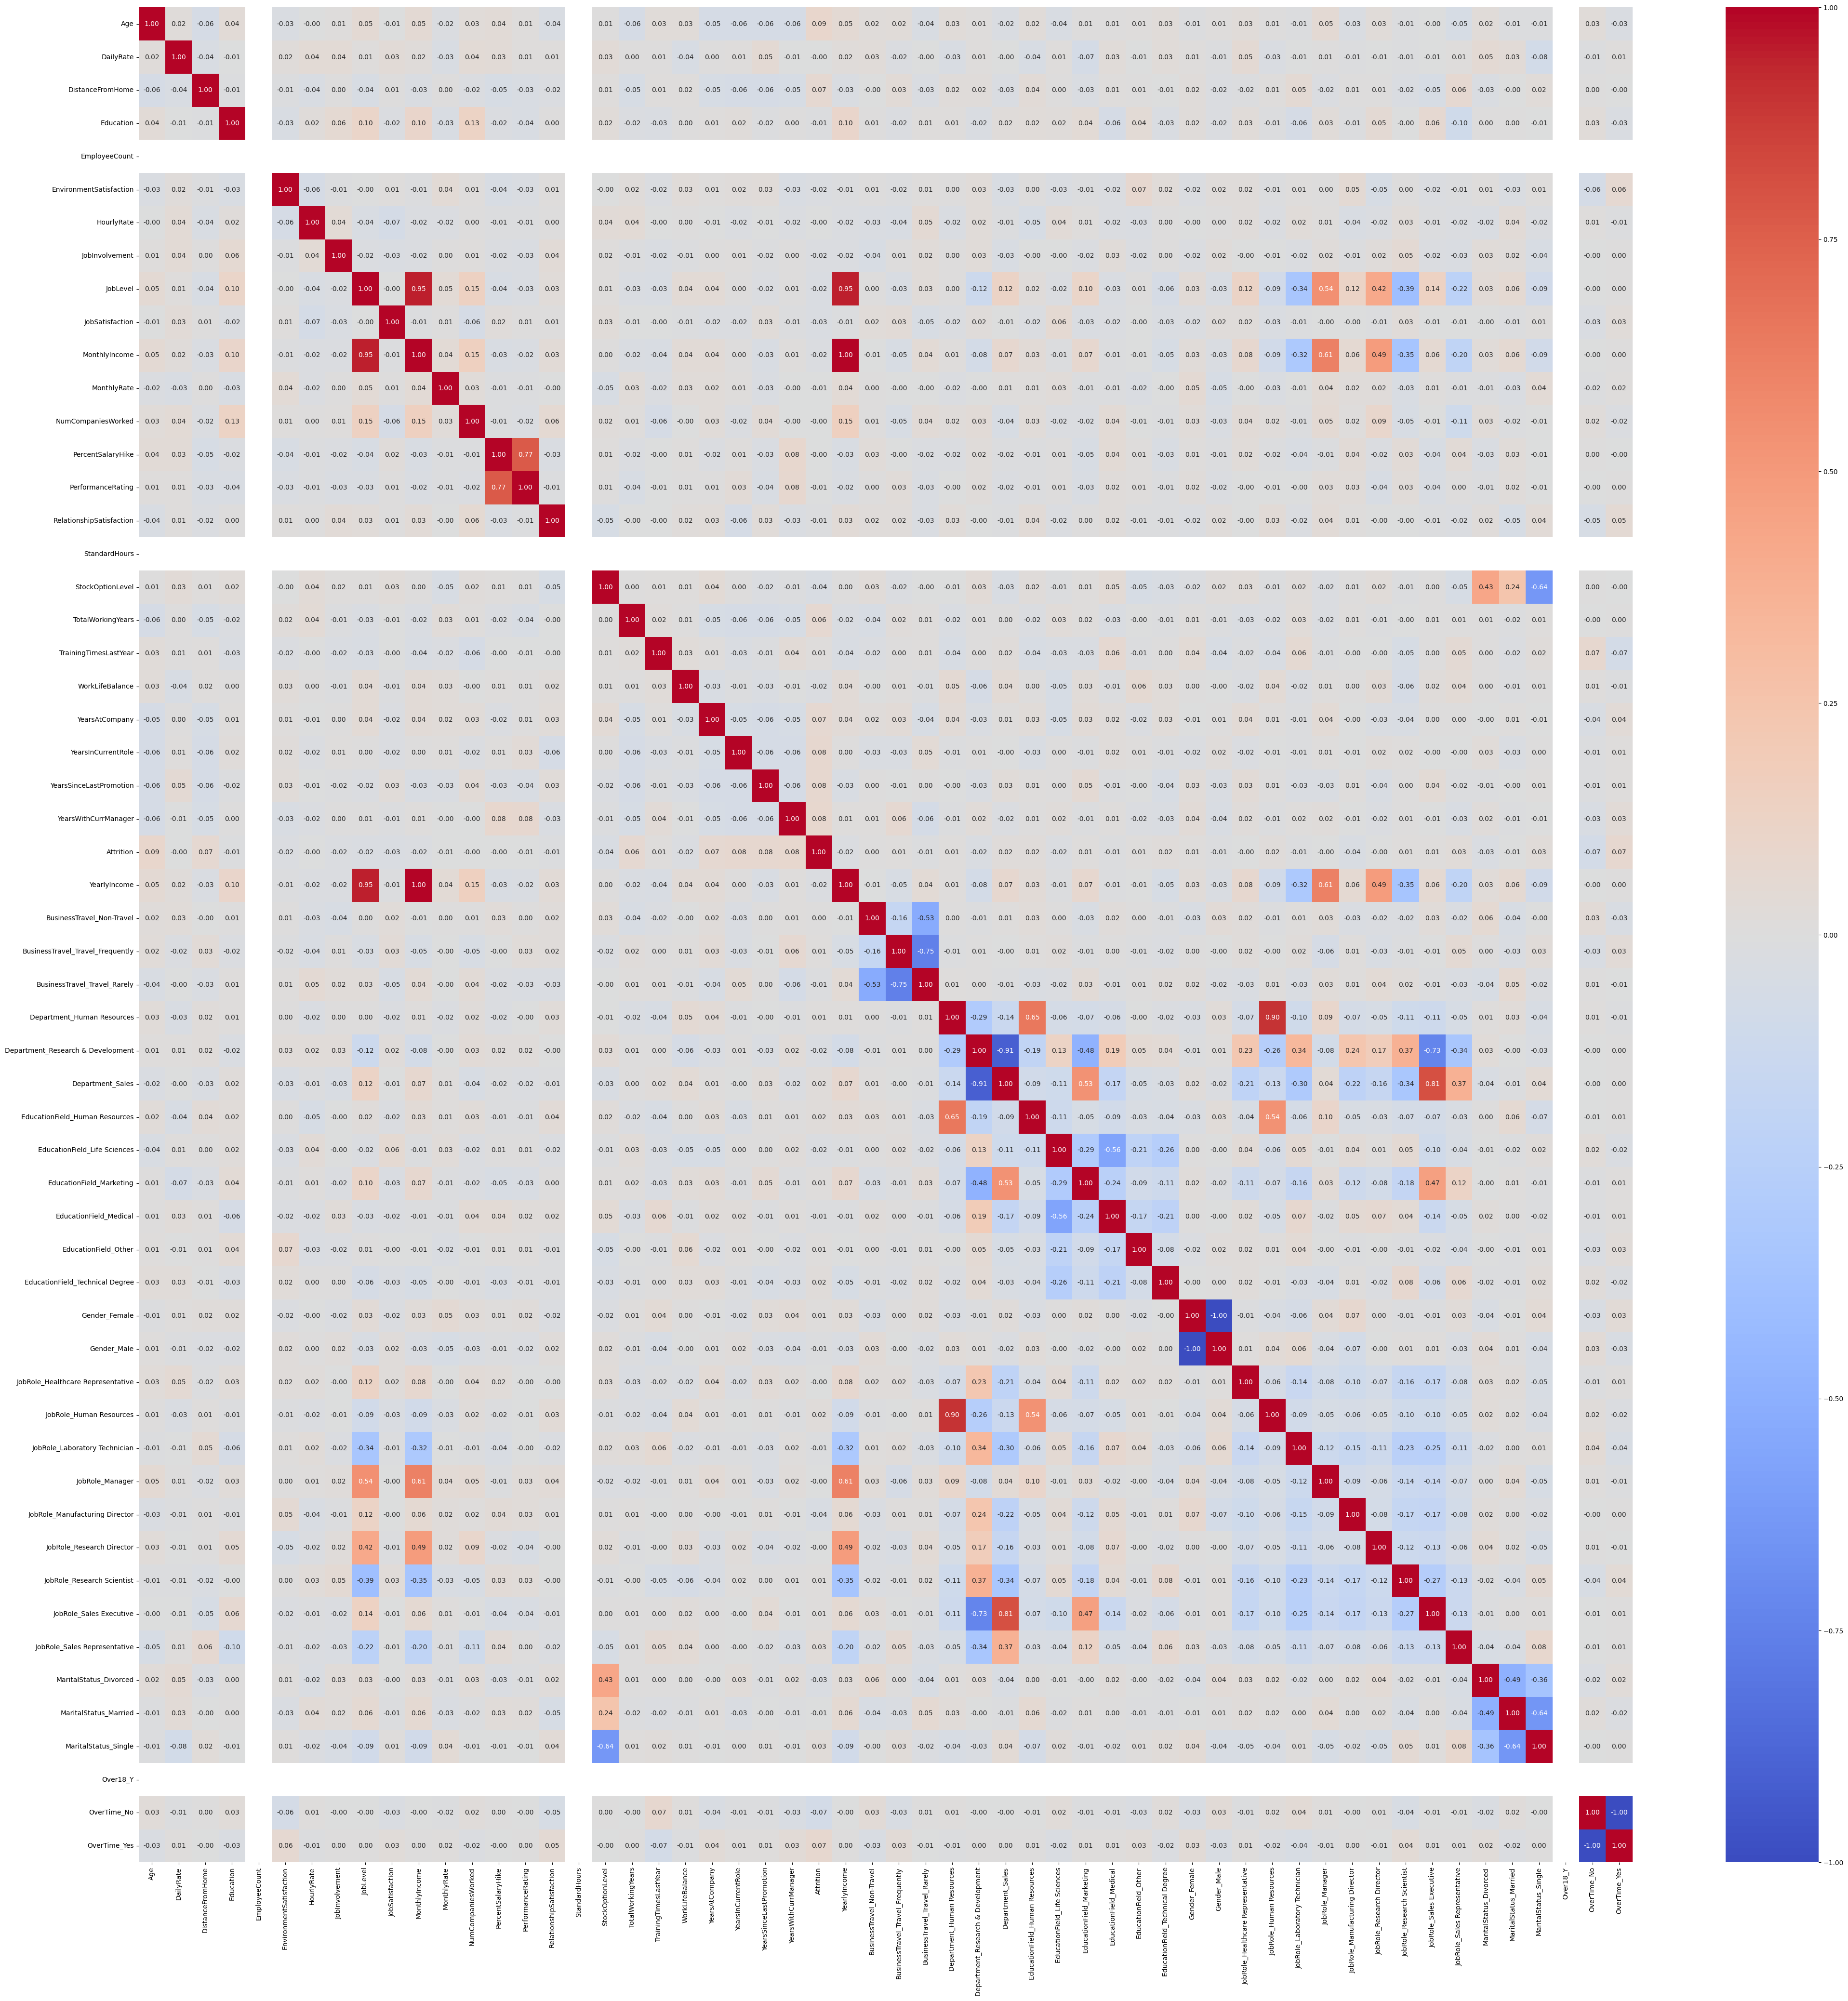

In [414]:
# Tworzenie wykresu
plt.figure(figsize=(50, 50))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

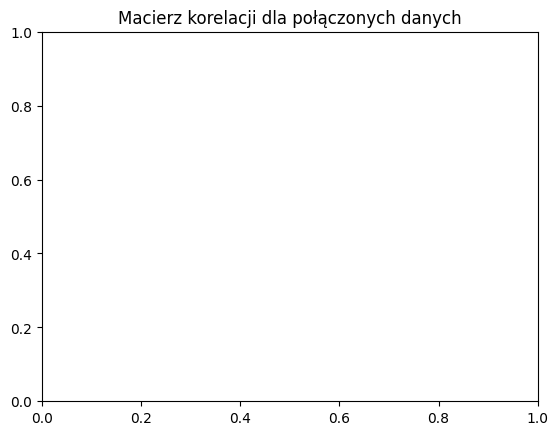

In [415]:
plt.title("Macierz korelacji dla połączonych danych")
plt.show()

In [416]:
print (df.shape)
df = df[np.abs(stats.zscore(df['YearsWithCurrManager'], nan_policy='omit')) < 3]
df = df[np.abs(stats.zscore(df['DistanceFromHome'], nan_policy='omit')) < 3]
df = df[np.abs(stats.zscore(df['YearsSinceLastPromotion'], nan_policy='omit')) < 3]
df = df[np.abs(stats.zscore(df['TrainingTimesLastYear'], nan_policy='omit')) < 3]
df = df[np.abs(stats.zscore(df['YearsInCurrentRole'], nan_policy='omit')) < 3]
print (df.shape)

(4302, 56)
(3696, 56)


# Podzial

In [417]:
# X=df[['MonthlyIncome', 'JobSatisfaction', 'EnvironmentSatisfaction', 'YearsWithCurrManager', 'WorkLifeBalance', 'DistanceFromHome', 'TotalWorkingYears', 'DailyRate']]
X=df[['DistanceFromHome', 'YearsSinceLastPromotion', 'TrainingTimesLastYear', 'YearsInCurrentRole', 'YearsWithCurrManager']]
y=df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=22)

In [418]:
X.shape

(3696, 5)

In [419]:
Y.shape

(3696,)

In [420]:
X_train.shape

(2956, 5)

In [421]:
X_test.shape

(740, 5)

# Model

In [423]:
models = {
    "MultinomialNB": MultinomialNB(),
    "GaussianNB": GaussianNB()
}

# Przetestuj różne wersje dyskretyzacji
k_values = [2, 3, 5]  # Różne wartości parametru k

results = []  # Lista do przechowywania wyników

for k in k_values:
    discretizers = {
        "No Discretization": None,
        "Uniform Discretization": KBinsDiscretizer(n_bins=k, encode='ordinal', strategy='uniform'),
        "Quantile Discretization": KBinsDiscretizer(n_bins=k, encode='ordinal', strategy='quantile')
    }

    # Przejdź przez różne modele i dyskretyzacje
    for model_name, model in models.items():
        for discretizer_name, discretizer in discretizers.items():
            # Stosuj dyskretyzację, jeśli dostępna
            if discretizer:
                X_train_discrete = discretizer.fit_transform(X_train)
                X_test_discrete = discretizer.transform(X_test)
            else:
                X_train_discrete, X_test_discrete = X_train, X_test

            # Trenuj model Bayesowski
            model.fit(X_train_discrete, y_train)

            # Przewiduj etykiety dla zbioru testowego
            y_pred = model.predict(X_test_discrete)

            # Oceń wydajność modelu za pomocą F1 score
            f1 = f1_score(y_test, y_pred, average='weighted')

            # Zapisz wyniki
            results.append({
                "Model": model_name,
                "Dyskretyzacja": discretizer_name,
                "k": k,
                "F1 Score": f1
            })

# Posortuj wyniki według F1 score malejąco
sorted_results = sorted(results, key=lambda x: x["F1 Score"], reverse=True)

# Wybierz najlepsze parametry (pierwszy wynik)
best_params = sorted_results[0]

print("Najlepsze parametry:")
print("Model:", best_params["Model"])
print("Dyskretyzacja:", best_params["Dyskretyzacja"])
print("k:", best_params["k"])
print("F1 Score:", best_params["F1 Score"])

Najlepsze parametry:
Model: MultinomialNB
Dyskretyzacja: Quantile Discretization
k: 2
F1 Score: 0.5310077548343948


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 2 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279

In [424]:
def plot_prediction_toy(X, y_true, model):
    fig, ax = plt.subplots()

    disp = DecisionBoundaryDisplay.from_estimator(
            model,
            X,
            response_method="predict",
            alpha=0.5,
            ax=ax,
        )
    scatter = disp.ax_.scatter(X[:, 0], X[:, 1], c=y_true, edgecolor="k")
    disp.ax_.legend(*scatter.legend_elements())
    plt.show()